In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


In [52]:
tf.random.set_seed(3)


In [54]:
train_data = pd.read_csv('/Users/anshulshukla/Downloads/digit-recognizer/train.csv')
test_data = pd.read_csv('/Users/anshulshukla/Downloads/digit-recognizer/test.csv')

In [55]:
print("Training Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)


Training Data Shape: (42000, 785)
Test Data Shape: (28000, 784)


In [56]:
X_train = train_data.drop(columns=['label'], axis=1).values
Y_train = train_data['label'].values

In [60]:
# Preview the first few rows of the data
print(train_data.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [62]:
# Reshape the training data to 28x28 images
X_train = X_train.reshape(X_train.shape[0], 28, 28)

In [64]:
# Scale the data to [0, 1]
X_train = X_train / 255.0

In [66]:
# Reshape the test data and scale
X_test = test_data.values.reshape(test_data.shape[0], 28, 28)
X_test = X_test / 255.0


In [68]:
# Check the unique values in Y_train
print("Unique values in Y_train:", np.unique(Y_train))


Unique values in Y_train: [0 1 2 3 4 5 6 7 8 9]


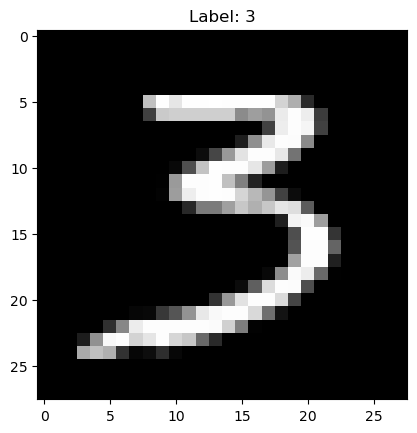

In [70]:
# Display an example digit
plt.imshow(X_train[25], cmap='gray')
plt.title(f"Label: {Y_train[25]}")
plt.show()


In [72]:
# Convert labels to one-hot encoding
Y_train = to_categorical(Y_train, num_classes=10)

In [74]:
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),  # Input layer to define input shape
    keras.layers.Flatten(),  # Flatten the 28x28 images
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),  # Add dropout for regularization
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # Use softmax for multi-class classification
])


In [76]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [78]:
# Split the data into training and validation sets
X_train_part, X_val, Y_train_part, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=3)


In [80]:
# Train the model
history = model.fit(X_train_part, Y_train_part, epochs=10, validation_data=(X_val, Y_val))


Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8246 - loss: 0.5819 - val_accuracy: 0.9442 - val_loss: 0.1795
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9461 - loss: 0.1735 - val_accuracy: 0.9592 - val_loss: 0.1314
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9607 - loss: 0.1260 - val_accuracy: 0.9651 - val_loss: 0.1126
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9686 - loss: 0.1002 - val_accuracy: 0.9655 - val_loss: 0.1170
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9723 - loss: 0.0862 - val_accuracy: 0.9654 - val_loss: 0.1133
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step - accuracy: 0.9764 - loss: 0.0737 - val_accuracy: 0.9702 - val_loss: 0.0985
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - accuracy: 0.9792 - loss: 0.0644 - val_accuracy: 0.9686 - val_loss: 0.1052
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step - accuracy: 0.9796 - loss: 0.0

In [82]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, Y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - accuracy: 0.9687 - loss: 0.1157
Validation Accuracy: 96.83%


In [84]:
# Predict the labels for the test data
Y_test_pred = model.predict(X_test)


875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step


In [86]:
Y_test_pred_labels = np.argmax(Y_test_pred, axis=1)


In [100]:
plt.figure(figsize=(14, 5))

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

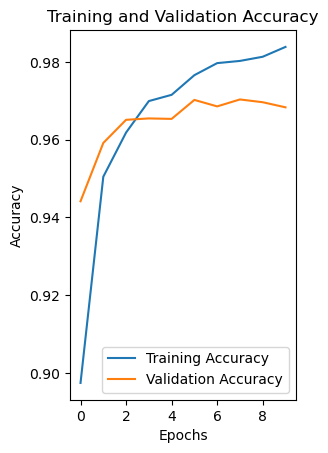

In [102]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


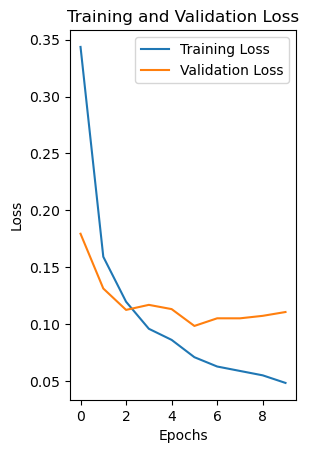

In [104]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [94]:
Y_val_pred = model.predict(X_val)  
Y_val_pred_classes = np.argmax(Y_val_pred, axis=1)  
Y_val_true_classes = np.argmax(Y_val, axis=1)  

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step


In [110]:
print("Classification Report:")
print(classification_report(Y_val_true_classes, Y_val_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       806
           1       0.98      0.99      0.98       886
           2       0.97      0.96      0.97       810
           3       0.97      0.96      0.96       860
           4       0.96      0.98      0.97       832
           5       0.97      0.96      0.96       790
           6       0.96      0.99      0.97       826
           7       0.98      0.96      0.97       909
           8       0.94      0.97      0.95       815
           9       0.98      0.94      0.96       866

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



In [96]:
cm = confusion_matrix(Y_val_true_classes, Y_val_pred_classes)

<function matplotlib.pyplot.show(close=None, block=None)>

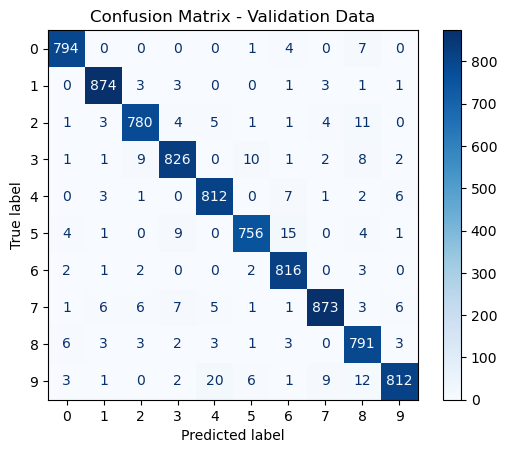

In [98]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Validation Data')
plt.show

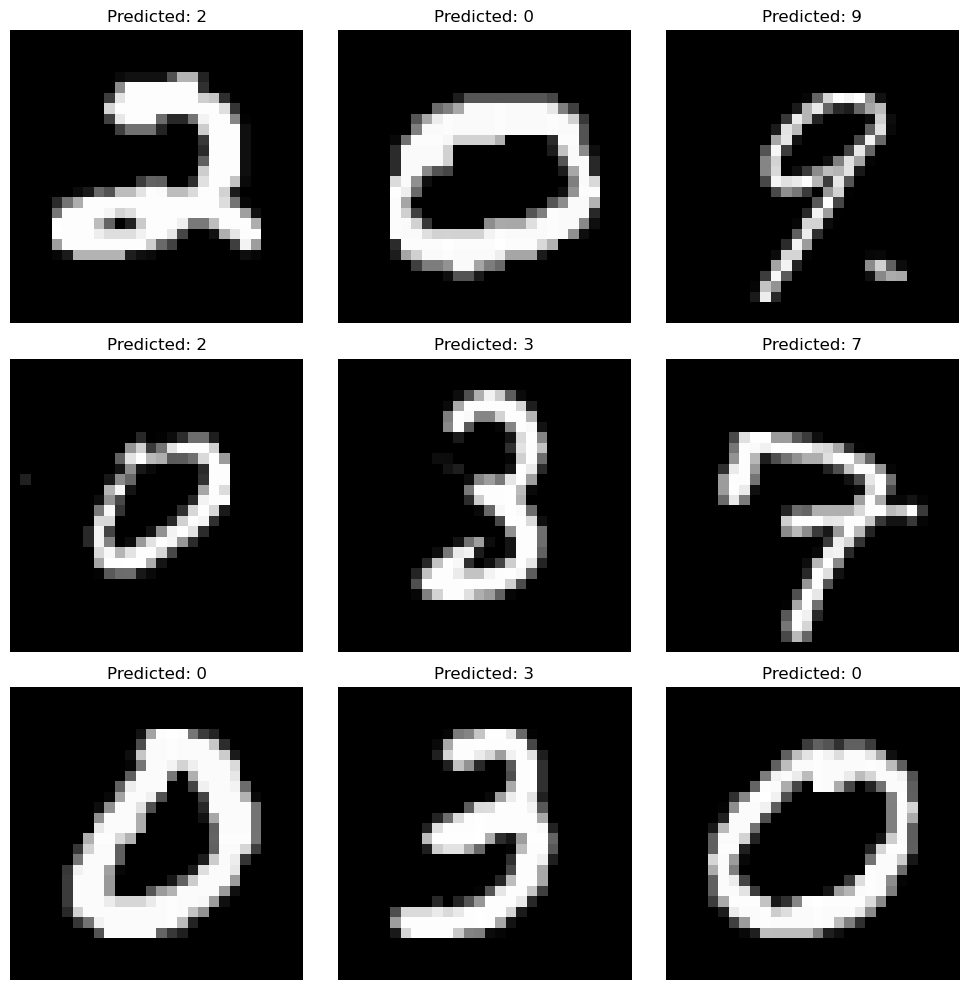

In [46]:
plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Predicted: {Y_test_pred_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [44]:
submission = pd.read_csv('/Users/anshulshukla/Downloads/digit-recognizer/sample_submission.csv')
submission['Label'] = Y_test_pred_labels
submission.to_csv('/Users/anshulshukla/Downloads/digit-recognizer/digit_recognizer_submission.csv', index=False)
print("Submission file saved.")

Submission file saved.
